In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = './'

In [3]:
df = pd.read_csv(path + 'train.csv')
df.head()

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD
0,2017,190590,12,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3416326.0,7657
1,2017,190590,36,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,438747025.0,5294788
2,2017,190590,40,Austria,1.664750e+11,1.948099e+10,0.0,4403.247293,4.172380e+11,3.955690e+11,8797566,NaN,78.856460,8289.029297,453206357.0,335818
3,2017,190590,56,Belgium,4.064120e+11,1.948099e+10,0.0,3980.375563,5.026980e+11,4.757400e+11,11375158,NaN,72.409200,8722.114258,706524512.0,173709
4,2017,190590,76,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,31329648.0,122850


In [4]:
idx = df[df['TARIFF_AVG'].isnull()].index
df = df.drop(idx)
idx = df[df["KR_TRADE_HSCD_COUNTRYCD"] == 0.0].index
df = df.drop(idx)
idx = df[df["TRADE_HSCD_COUNTRYCD"].isnull()].index
df = df.drop(idx)
idx = df[df['PA_NUS_FCRF'].isnull()].index
df = df.drop(idx)
idx = df[df['SNDIST'].isnull()].index
df = df.drop(idx)

In [5]:
df.head()
df.to_csv('./main_clearNull.csv')

In [6]:
df['_HSCD'] = df['HSCD'].copy()

In [7]:
hcsd_uniq = df['HSCD'].unique()
for i in range(len(df['HSCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['HSCD'].iloc[i]:
      df['HSCD'].iloc[i] = (x+1)
      break

df.head()

/home/jihoon/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,_HSCD
0,2017,1,12,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3.416326e+06,7657,190590
1,2017,1,36,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,4.387470e+08,5294788,190590
4,2017,1,76,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,3.132965e+07,122850,190590
5,2017,1,104,Myanmar,1.925344e+10,1.948099e+10,5.0,5891.659995,6.894587e+10,6.718424e+10,53382581,1360.358707,42.671390,3796.142578,1.276182e+07,631082,190590
6,2017,1,124,Canada,4.324050e+11,1.948099e+10,0.0,7911.783801,1.649880e+12,1.528240e+12,36543321,1.297936,79.540940,10617.703130,1.113991e+09,7273171,190590


In [8]:
hcsd_uniq = df['COUNTRYCD'].unique()
for i in range(len(df['COUNTRYCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['COUNTRYCD'].iloc[i]:
      df['COUNTRYCD'].iloc[i] = (x+1)
      break
#df['TARIFF_AVG'] = df['TARIFF_AVG'] / 100
#df['IC_BUS_EASE_DFRN_DB'] = df['IC_BUS_EASE_DFRN_DB'] / 100
#df['KMDIST'] = df['KMDIST']/100 # total -> divided 10000
#df['gdp_percent'] = df['gdp_percent'] / 100


######################################################################
df.head()

/home/jihoon/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,_HSCD
0,2017,1,1,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3.416326e+06,7657,190590
1,2017,1,2,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,4.387470e+08,5294788,190590
4,2017,1,3,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,3.132965e+07,122850,190590
5,2017,1,4,Myanmar,1.925344e+10,1.948099e+10,5.0,5891.659995,6.894587e+10,6.718424e+10,53382581,1360.358707,42.671390,3796.142578,1.276182e+07,631082,190590
6,2017,1,5,Canada,4.324050e+11,1.948099e+10,0.0,7911.783801,1.649880e+12,1.528240e+12,36543321,1.297936,79.540940,10617.703130,1.113991e+09,7273171,190590


In [8]:
df.head()

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,_HSCD
0,2017,1,1,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3.416326e+06,7657,190590
1,2017,1,2,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,4.387470e+08,5294788,190590
4,2017,1,3,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,3.132965e+07,122850,190590
5,2017,1,4,Myanmar,1.925344e+10,1.948099e+10,5.0,5891.659995,6.894587e+10,6.718424e+10,53382581,1360.358707,42.671390,3796.142578,1.276182e+07,631082,190590
6,2017,1,5,Canada,4.324050e+11,1.948099e+10,0.0,7911.783801,1.649880e+12,1.528240e+12,36543321,1.297936,79.540940,10617.703130,1.113991e+09,7273171,190590


<AxesSubplot:>

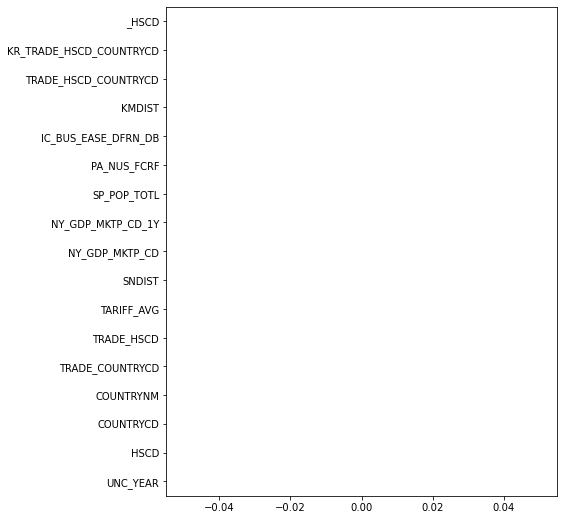

In [9]:
df.isnull().mean().plot.barh(figsize=(7,9))

In [10]:
df.shape


(17269, 17)

In [11]:
df["item_total_percent"] = df["TRADE_HSCD_COUNTRYCD"]/ df["TRADE_COUNTRYCD"] * 100
df["item_world_percent"] = df["TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD"] * 100
df["gdp_percent"] = df["NY_GDP_MKTP_CD"] / df["NY_GDP_MKTP_CD_1Y"] * 100
df["next_year_percent"] = df["KR_TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD_COUNTRYCD"] * 100
df["next_year_percent"]

0        0.224130
1        1.206797
4        0.392121
5        4.945077
6        0.652893
           ...   
21098    0.870154
21099    2.552436
21100    0.412353
21101    0.273898
21102    6.848066
Name: next_year_percent, Length: 17269, dtype: float64

In [12]:
df.head()
# df = df.drop('KR_TRADE_HSCD_COUNTRYCD', axis=1).copy()
# df = df.drop('TRADE_HSCD_COUNTRYCD', axis=1).copy()

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,...,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,_HSCD,item_total_percent,item_world_percent,gdp_percent,next_year_percent
0,2017,1,1,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,...,110.973017,46.109810,9954.009766,3.416326e+06,7657,190590,0.007418,0.017537,106.355199,0.224130
1,2017,1,2,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,...,1.304758,80.223690,8329.652344,4.387470e+08,5294788,190590,0.192061,2.252181,109.954916,1.206797
4,2017,1,3,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,...,3.191389,55.382403,18364.505860,3.132965e+07,122850,190590,0.020783,0.160822,114.876093,0.392121
5,2017,1,4,Myanmar,1.925344e+10,1.948099e+10,5.0,5891.659995,6.894587e+10,6.718424e+10,...,1360.358707,42.671390,3796.142578,1.276182e+07,631082,190590,0.066283,0.065509,102.622089,4.945077
6,2017,1,5,Canada,4.324050e+11,1.948099e+10,0.0,7911.783801,1.649880e+12,1.528240e+12,...,1.297936,79.540940,10617.703130,1.113991e+09,7273171,190590,0.257627,5.718352,107.959483,0.652893


In [12]:
copy_df = df.copy()

In [13]:

df['KMDIST'] = df['KMDIST'] / 100
df['SNDIST'] = df['SNDIST'] / 100
df['SP_POP_TOTL'] = (df['SP_POP_TOTL'] - df['SP_POP_TOTL'].min()) / (df['SP_POP_TOTL'].max() - df['SP_POP_TOTL'].min())
# 'SP_POP_TOTL', 
copy_df = df.copy()
df = df.drop(columns=['_HSCD'])
df = df.drop(columns=['UNC_YEAR', 'COUNTRYNM'])
df = df.drop(columns=['KR_TRADE_HSCD_COUNTRYCD', 'TRADE_HSCD_COUNTRYCD', 'TRADE_COUNTRYCD', 'TRADE_HSCD', 'NY_GDP_MKTP_CD', 'NY_GDP_MKTP_CD_1Y'])

In [15]:
df.head()

,HSCD,COUNTRYCD,TARIFF_AVG,SNDIST,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,item_total_percent,item_world_percent,gdp_percent,next_year_percent
0,1,1,30.0,38.782384,0.027670,110.973017,46.109810,99.540098,0.007418,0.017537,106.355199,0.224130
1,1,2,0.0,122.031560,0.015534,1.304758,80.223690,83.296523,0.192061,2.252181,109.954916,1.206797
4,1,3,18.0,96.442069,0.147996,3.191389,55.382403,183.645059,0.020783,0.160822,114.876093,0.392121
5,1,4,5.0,58.916600,0.036340,1360.358707,42.671390,37.961426,0.066283,0.065509,102.622089,4.945077
6,1,5,0.0,79.117838,0.024167,1.297936,79.540940,106.177031,0.257627,5.718352,107.959483,0.652893


In [14]:
df.to_csv('./norm.csv')

In [15]:
# copy_df = df.copy()

In [16]:
# copy_df.head()

In [17]:
print(df.shape)
tr = int(df.shape[0]*6/10) # Train
te = int((df.shape[0] - tr)/2) # Test (actually Train)
va = df.shape[0] - tr - te # Validation (actually Test)
print(tr,te, va)

(17269, 12)
10361 3454 3454


In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opti
torch.manual_seed(1015)
device = torch.device("cuda")

In [19]:
import torch
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

x_train = torch.FloatTensor(df.iloc[:tr+te,:-1].values).to(device)
y_train = torch.FloatTensor(df.iloc[:tr+te,-1].values).to(device)
x_test = torch.FloatTensor(df.iloc[tr+te:,:-1].values).to(device)
y_test = torch.FloatTensor(df.iloc[tr+te:,-1].values).to(device)

max(y_train)
y_train = torch.reshape(y_train, (-1,1))


In [20]:
y_test = y_test.reshape(-1,1)

In [23]:
len(df)

17269

In [21]:
print(x_train.shape)
print(y_train.shape)
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

torch.Size([13815, 11])
torch.Size([13815, 1])


In [22]:
y_test.shape

torch.Size([3454, 1])

In [23]:
# LSTM Model Test
import torch.nn as nn

sequence_length = x_train.shape[1]
input_size = x_train.shape[1]
hidden_size = 512
num_layers = 2
num_classes = 1
batch_size = 128

learning_rate = 0.01
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__() # 상속한 nn.Module에서 RNN에 해당하는 init 실행
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.5)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x): 
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) # (BATCH SIZE, SEQ_LENGTH, HIDDEN_SIZE)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) # hidden state와 동일

        out, _ = self.lstm(x, (h0, c0)) # output : (BATCH_SIZE, SEQ_LENGTH, HIDDEN_SIZE) tensors. (hn, cn)은 필요 없으므로 받지 않고 _로 처리합니다. 

        out = self.fc(out[:, -1, :])
        return out
    
class DeepModel(nn.Module):
    def __init__(self, in_channel, out_channel):
        super(DeepModel, self).__init__()

        self.basic = nn.BatchNorm1d(in_channel)
        self.layer1 = nn.Linear(in_channel, 256)
        self.dropout1 = nn.Dropout(0.5)
        self.bn1 = nn.BatchNorm1d(256)
        self.layer2 = nn.Linear(256, 64)
        self.dropout2 = nn.Dropout(0.5)
        self.bn2 = nn.BatchNorm1d(64)
        self.head = nn.Linear(64, out_channel)

    def forward(self, x):
        x = x.to(device)
        x = self.basic(x)
        x = F.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        x = F.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)

        return self.head(x)

modelLinear = nn.Linear(x_train.shape[1], 1).to(device)



# model = nn.Linear(9,1).to(device)


# LSTM - L1 Loss Model

In [ ]:


# LSTM
deepmodel = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-5)

num_epochs = 100
total_step = len(dataloader)
for epoch in range(num_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_t, y_t = samples
        x_t = x_t.reshape(-1, 1, input_size)

        pred = deepmodel(x_t)
        
#         loss = F.mse_loss(y_t, pred)
        loss = F.l1_loss(y_t, pred)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (batch_idx+1) % 100 == 0: 
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(
                epoch+1, num_epochs, batch_idx+1, total_step, loss.item()))
torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_LSTM_L1.pth')



In [ ]:
x_te = x_test.reshape(-1,1,input_size)
pred_y = deepmodel(x_te)
torch.mean(torch.abs(pred_y - y_test))

# MODEL LOAD FINISH
# MODEL LOAD FINISH
# MODEL LOAD FINISH

# L2 Loss model

In [ ]:
deepmodel = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel.eval()
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-5)

In [ ]:
n_epochs = 200
loss_list1 = []
test_loss_list1 = []
for epoch in range(n_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_t, y_t = samples

        pred = deepmodel(x_t).to(device)
        cost = F.mse_loss(y_t, pred)
        loss_list1.append(cost)
        with torch.no_grad():
            pred_y = modelL1(x_test)
            test_loss_list1.append(F.mse_loss(pred_y, y_test))
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

In [ ]:
pred_y = deepmodel(x_test)
torch.mean(torch.abs(pred_y - y_test))

In [ ]:
torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_L2.pth')

# l1 loss model

In [ ]:
deepmodel2 = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel2.eval()#F.l1_loss
optimizer2 = torch.optim.Adam(deepmodel2.parameters(), lr=1e-5)

In [ ]:
n_epochs = 100
loss_list2 = []
test_loss_list2 = []
for epoch in range(n_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_t, y_t = samples

        pred = deepmodel2(x_t).to(device)
        cost = F.l1_loss(y_t, pred)
        loss_list2.append(cost)
        with torch.no_grad():
            pred_y = deepmodel2(x_test)
            test_loss_list2.append(F.l1_loss(pred_y, y_test))
        optimizer2.zero_grad()
        cost.backward()
        optimizer2.step()
        print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

In [ ]:
pred_y = deepmodel2(x_test)
#y_test = y_test.reshape(-1,1)
torch.mean(torch.abs(pred_y - y_test))

In [ ]:
torch.save(deepmodel2.state_dict(), './last_all_feature_and_all_norm_L1.pth')

In [ ]:
np.mean([l.item() for l in loss_list2[:10]])

In [ ]:
# loss_l = [(loss_list[i*10] - mi)/(ma - mi) for i in range(int(len(loss_list)/10))]
import numpy as np
count = int(len(loss_list2)/10) -1
# loss_l = [np.mean([n.item() for n in loss_list[i*10:i*10+10]]) for i in range(10000) if np.mean([n.item() for n in loss_list[i*10:i*10+10]]) < 100]


loss_l = [np.mean([l.item() for l in loss_list2[i:i+10]]) for i in range(0, count, 10)]
# loss_l = [np.mean([n.item() for n in loss_list2[i*10:i*10+10]]) 
#           for i in range(count) if np.mean([n.item() for n in loss_list2[i*10:i*10+10]]) < 1000]


loss_test_l = [np.mean([l.item() for l in test_loss_list2[i:i+10]]) for i in range(0, count, 10)]
# loss_test_l = [np.mean([n.item() for n in test_loss_list2[i*10:i*10+10]]) 
#                for i in range(count) if np.mean([n.item() for n in test_loss_list2[i*10:i*10+10]]) < 1000]

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.plot([i for i in range(len(loss_l))],loss_l, 'blue', label='Train Loss')
plt.plot([i for i in range(len(loss_test_l))][:count],loss_test_l, 'red', label='Test Loss')
plt.legend(loc='upper right')
plt.show()





In [ ]:
# loss_l

In [ ]:
# torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_L2.pth')
# torch.save(deepmodel2.state_dict(), './last_all_feature_and_all_norm_L1.pth')
# torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_LSTM_L1.pth')

# Multivariable regression Model

In [ ]:
modelL1 = nn.Linear(x_train.shape[1], 1).to(device)
optimizerL1 = torch.optim.Adam(modelL1.parameters(), lr=1e-5)

n_epochs = 1000
loss_list = []
test_loss_list = []
for epoch in range(n_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_t, y_t = samples
        
        pred = modelL1(x_t)
        cost = F.mse_loss(pred, y_t)
#         cost = F.l1_loss(pred, y_t)
        loss_list.append(cost)
        with torch.no_grad():
            pred_y = modelL1(x_test)
            test_loss_list.append(torch.mean(torch.abs(pred_y - y_test)))
        optimizerL1.zero_grad()
        cost.backward()
        optimizerL1.step()
        print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

torch.save(modelL1.state_dict(), './last_all_feature_and_all_norm_Regression_L2TEST.pth')

In [ ]:
pred_y = modelL1(x_test)

In [ ]:
torch.mean(torch.abs(pred_y - y_test))

In [ ]:
# model = nn.Linear(x_train.shape[1], 1).to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
# n_epochs = 100
# loss_list = []
# test_loss_list = []
# for epoch in range(n_epochs):
#     for batch_idx, samples in enumerate(dataloader):
#         x_t, y_t = samples
        
#         pred = model(x_t)
#         cost = F.l1_loss(pred, y_t)
# #         cost = F.l1_loss(y_train, pred)
#         loss_list.append(cost)
#         with torch.no_grad():
#             pred_y = model(x_test)
#             test_loss_list.append(torch.mean(torch.abs(pred_y - y_test)))
#         optimizer.zero_grad()
#         cost.backward()
#         optimizer.step()
#         print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

# train Fin

# L1 case Start

In [ ]:
torch.set_printoptions(sci_mode=False)

In [ ]:
deepmodel = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L1.pth"))
deepmodel.eval()

In [ ]:
pred_y = deepmodel(x_test)

In [ ]:
pred_y.shape

In [ ]:
y_test = y_test.reshape(-1,1)
y_test

In [ ]:
pred_y.mean()

In [ ]:
torch.mean(torch.abs(pred_y - y_test))

# test Field

In [ ]:
# DNN
pred_y = deepmodel(x_test)


# LSTM
# x_te = x_test.reshape(-1, 1, input_size)
# pred_y = deepmodel(x_te)

_data_len = len(y_test)
plt.figure(figsize=(20,10))

plot_list = [idx for idx in range(_data_len) if abs(y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx]) <= 10 or True]

# plot_list = []
# for idx in range(_data_len):
#     fix = abs(y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx])
#     if fix<= 10:
#         plot_list.append(idx)
#     else:
#         pass
data_len = len(plot_list)
# print(plot_list)
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(y_test.cpu().detach().numpy()) if i in plot_list], 'ro', label='Real')
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'bx', label='Pred')
# plt.plot([i for i in range(data_len)], [n for i, n in enumerate(y_test.cpu().detach().numpy()) if i in plot_list], 'r', label='Real_line')
# plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'b', label='Pred_line')

height = 60#max(y_test.cpu().detach().numpy())
plt.axis([0, data_len, 0, height])
plt.legend()

# ITEM t-test start

In [27]:
tmp = copy_df.iloc[tr+te:,:].copy()
tmp['pred'] = pred_y.detach().cpu().numpy()
# tmp.head()
# tmp.iloc[:,16].unique()
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3454 entries, 16908 to 21102
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UNC_YEAR                 3454 non-null   int64  
 1   HSCD                     3454 non-null   int64  
 2   COUNTRYCD                3454 non-null   int64  
 3   COUNTRYNM                3454 non-null   object 
 4   TRADE_COUNTRYCD          3454 non-null   float64
 5   TRADE_HSCD               3454 non-null   float64
 6   TARIFF_AVG               3454 non-null   float64
 7   SNDIST                   3454 non-null   float64
 8   NY_GDP_MKTP_CD           3454 non-null   float64
 9   NY_GDP_MKTP_CD_1Y        3454 non-null   float64
 10  SP_POP_TOTL              3454 non-null   float64
 11  PA_NUS_FCRF              3454 non-null   float64
 12  IC_BUS_EASE_DFRN_DB      3454 non-null   float64
 13  KMDIST                   3454 non-null   float64
 14  TRADE_HSCD_COUNTRYC

In [28]:
import scipy.stats

cnt = 0
item_list = sorted(tmp.iloc[:,16].unique())
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 16] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
    pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
    p_val = scipy.stats.ttest_ind(ground_truth, pred, equal_var=False).pvalue
    
    print('countrys : ', item_df['COUNTRYNM'].unique())
    
    diff = np.mean(np.abs(ground_truth - pred))
    if p_val < 0.05:
        cnt+=1
    
    print("{} Item : {}".format(item_number, diff))
    print("p-value : {}\n".format(p_val))
print("\nRESULT : ", cnt, " / ", len(item_list))

countrys :  ['Algeria' 'Australia' 'Brazil' 'Canada' 'Sri Lanka' 'Chile' 'China'
 'Czechia' 'China, Hong Kong SAR' 'Indonesia' 'Japan' 'Kazakhstan'
 'Kuwait' 'Malaysia' 'Mexico' 'Mongolia' 'New Zealand' 'Norway' 'Peru'
 'Philippines' 'Poland' 'Russian Federation' 'Saudi Arabia' 'India'
 'Singapore' 'Viet Nam' 'South Africa' 'Switzerland'
 'United Arab Emirates' 'Turkey' 'Egypt' 'United Kingdom' 'USA']
820210 Item : 206265.76234132834
p-value : 0.14544764486160602

countrys :  ['Algeria' 'Australia' 'Brazil' 'Myanmar' 'Canada' 'Sri Lanka' 'Chile'
 'China' 'Czechia' 'China, Hong Kong SAR' 'Indonesia' 'Iran' 'Japan'
 'Kuwait' 'Malaysia' 'Mexico' 'Mongolia' 'New Zealand' 'Norway' 'Peru'
 'Philippines' 'Poland' 'Russian Federation' 'Saudi Arabia' 'India'
 'Singapore' 'Viet Nam' 'South Africa' 'Switzerland'
 'United Arab Emirates' 'Turkey' 'Egypt' 'United Kingdom' 'USA']
820239 Item : 1379665.8074444428
p-value : 0.2618282524365308

countrys :  ['Algeria' 'Australia' 'Brazil' 'Canada' 'Chile

# normal - t-test FIN

---
# t-test | train + test data

In [29]:
t = torch.cat([x_train, x_test])
if CASE == 'LSTM':
    # LSTM
    t = t.reshape(-1, 1, input_size)
    pred_y = deepmodel(t)
    
else:
    # DNN & Linear Regression
    pred_y = deepmodel(t)

tmp_all = copy_df.copy()
tmp_all['pred'] = pred_y.detach().cpu().numpy()
# tmp.head()
# tmp.iloc[:,16].unique()
tmp_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17269 entries, 0 to 21102
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UNC_YEAR                 17269 non-null  int64  
 1   HSCD                     17269 non-null  int64  
 2   COUNTRYCD                17269 non-null  int64  
 3   COUNTRYNM                17269 non-null  object 
 4   TRADE_COUNTRYCD          17269 non-null  float64
 5   TRADE_HSCD               17269 non-null  float64
 6   TARIFF_AVG               17269 non-null  float64
 7   SNDIST                   17269 non-null  float64
 8   NY_GDP_MKTP_CD           17269 non-null  float64
 9   NY_GDP_MKTP_CD_1Y        17269 non-null  float64
 10  SP_POP_TOTL              17269 non-null  float64
 11  PA_NUS_FCRF              17269 non-null  float64
 12  IC_BUS_EASE_DFRN_DB      17269 non-null  float64
 13  KMDIST                   17269 non-null  float64
 14  TRADE_HSCD_COUNTRYCD  

In [30]:
import scipy.stats

cnt = 0
item_list = sorted(tmp_all.iloc[:,16].unique())
for item_number in item_list:
    item_df = tmp_all[tmp_all.iloc[:, 16] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
    pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
    p_val = scipy.stats.ttest_ind(ground_truth, pred, equal_var=False).pvalue
    
    diff = np.mean(np.abs(ground_truth - pred))
    if p_val < 0.05:
        cnt+=1
    
    #print("{} Item : {}".format(item_number, diff))
    #print("p-value : {}\n".format(p_val))
print("\nRESULT : ", cnt, " / ", len(item_list))


RESULT :  38  /  497


# train + test Data - t-test FIN

# item - country : not matching

In [124]:
item_list = sorted(tmp_all.iloc[:,16].unique())


for item in item_list:
    _item_df = tmp_all[tmp_all.iloc[:, 16] == item]
    
    if _item_df.shape[0] != len(_item_df['COUNTRYCD'].unique()):
        print("x")
#     if _item_df.shape[0] != 35:
#         print('ITEM : ', item, "NUm : ", _item_df.shape[0])
#     if _item_df.shape[0] > 35:
#         print(sorted(_item_df['COUNTRYNM']))


In [113]:
len(sorted(_item_df['COUNTRYCD'].unique()))

35

In [114]:
_item_df[_item_df['COUNTRYCD'] == 5]

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,...,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,_HSCD,item_total_percent,item_world_percent,gdp_percent,next_year_percent,pred
6,2017,1,5,Canada,4.324050e+11,1.948099e+10,0.0,79.117838,1.649880e+12,1.528240e+12,...,79.54094,106.177031,1.113991e+09,7273171,190590,0.257627,5.718352,107.959483,0.652893,1.245726


In [ ]:
import scipy.stats

cnt = 0
item_list = sorted(tmp_all.iloc[:,16].unique())
for item_number in item_list:
    _item_df = tmp_all[tmp_all.iloc[:, 16] == item_number]
    
    country_list = sorted(_item_df['COUNTRYCD'].unique())
    for country in country_list:
        item_df = _item_df[_item_df['COUNTRYCD'] == country]
        
        ground_truth = item_df['next_year_percent']
        pred = item_df['pred']
        p_val = scipy.stats.ttest_ind(ground_truth, pred, equal_var=False).pvalue

        diff = np.mean(np.abs(ground_truth - pred))
        if p_val < 0.05:
            cnt+=1
    
#     print("{} Item : {}".format(item_number, diff))
#     print("p-value : {}\n".format(p_val))
print("\nRESULT : ", cnt, " / ", len(item_list))

In [95]:
tmp.head()

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,...,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,_HSCD,item_total_percent,item_world_percent,gdp_percent,next_year_percent,pred
16908,2017,399,13,Iran,5.161228e+10,6.404620e+10,12.0,40.939509,4.453450e+11,4.179840e+11,...,55.707860,65.624482,6.592452e+07,300,847150,0.127730,0.102933,106.545944,0.000455,4.674330
16910,2017,399,14,Japan,6.714740e+11,6.404620e+10,0.0,78.954807,4.866860e+12,4.922540e+12,...,78.020697,11.566696,3.942546e+09,6534855,847150,0.587148,6.155785,98.868877,0.165752,4.171092
16911,2017,399,15,Kazakhstan,2.934591e+10,6.404620e+10,0.0,50.550694,1.668060e+11,1.372780e+11,...,74.848790,42.277720,4.830666e+07,25746,847150,0.164611,0.075425,121.509637,0.053297,0.742438
16912,2017,399,36,Kuwait,3.356833e+10,6.404620e+10,0.0,53.642850,1.207070e+11,1.094200e+11,...,59.969240,71.810249,1.047815e+08,99868,847150,0.312144,0.163603,110.315299,0.095311,2.073210
16913,2017,399,16,Malaysia,1.947200e+11,6.404620e+10,0.0,74.398315,3.191120e+11,3.012550e+11,...,78.272910,46.140674,2.689531e+08,489257,847150,0.138123,0.419936,105.927536,0.181912,1.542309


In [96]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3454 entries, 16908 to 21102
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UNC_YEAR                 3454 non-null   int64  
 1   HSCD                     3454 non-null   int64  
 2   COUNTRYCD                3454 non-null   int64  
 3   COUNTRYNM                3454 non-null   object 
 4   TRADE_COUNTRYCD          3454 non-null   float64
 5   TRADE_HSCD               3454 non-null   float64
 6   TARIFF_AVG               3454 non-null   float64
 7   SNDIST                   3454 non-null   float64
 8   NY_GDP_MKTP_CD           3454 non-null   float64
 9   NY_GDP_MKTP_CD_1Y        3454 non-null   float64
 10  SP_POP_TOTL              3454 non-null   float64
 11  PA_NUS_FCRF              3454 non-null   float64
 12  IC_BUS_EASE_DFRN_DB      3454 non-null   float64
 13  KMDIST                   3454 non-null   float64
 14  TRADE_HSCD_COUNTRYC

# pred & ground truth - comp // SAMPLE

In [32]:
tmp = copy_df.iloc[tr+te:,:].copy()
tmp.iloc[:,16]

16908    847150
16910    847150
16911    847150
16912    847150
16913    847150
          ...  
21098    820210
21099    820210
21100    820210
21101    820210
21102    820210
Name: _HSCD, Length: 3454, dtype: int64

In [ ]:
tmp = copy_df.iloc[tr+te:,:].copy()
# 3, 14, 15, 16
arr = [(t.item(), p.item(), abs(t.item()-p.item()), d0, d1, c, item_no) for t,p, d0, d1, c, item_no in zip(y_test, pred_y, tmp.iloc[:,14], tmp.iloc[:,15], tmp.iloc[:,3], tmp.iloc[:,16])] # 0: past, 1: next
arr = sorted(arr, key=lambda x : abs(x[0] - x[1]))

In [ ]:
arr[:10]

In [ ]:
arr[-10:]

In [ ]:
copy_df.iloc[tr+te:,14:16]

In [ ]:
# arr = [(t.item(), p.item(), abs(t.item()-p.item()), d0, d1, c, item_no) for t,p, d0, d1, c, item_no in zip(y_test, pred_y, tmp.iloc[:,14], tmp.iloc[:,15], tmp.iloc[:,3], tmp.iloc[:,16])] # 0: past, 1: next

res_df = pd.DataFrame()

In [ ]:
res_df['percentage - Ground Truth'] = [item[0] for item in arr]
res_df['percentage - Prediction'] = [item[1] for item in arr]
res_df['Diff - Ground Truth & Prediction'] = [item[2] for item in arr]
res_df['previous - trade price'] = [item[3] for item in arr]
res_df['next - trade price'] = [item[4] for item in arr]
res_df['Country'] = [item[5] for item in arr]
res_df['Item Code'] = [item[6] for item in arr]

In [ ]:
res_df[:].to_csv('./pred_result.csv')

In [ ]:
res_df.head()

In [ ]:
pd.concat([res_df.iloc[:10, :], res_df.iloc[-10:, :]]).to_csv('./sortedResult.csv')

In [ ]:
res_df.iloc[:10, :]

In [ ]:
res_df.iloc[-10:, :]

In [ ]:
copy_df.head()

# test Field

In [ ]:
diff_list = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]

In [ ]:
diff_list = np.array(diff_list)

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np
#plt.figure(figsize=(40,5))
#plt.plot(np.arange(4143), [x.item() - y.item() for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
#plt.plot(np.arange(4143), [x.item() for x in ])

In [ ]:
#gt = [y.item() for y in y_test.reshape(-1)]
#pred = [y.item() for y in pred_y.reshape(-1)]
#plt.figure(figsize=(40,5))
#plt.scatter(gt, pred)

In [ ]:
#r = np.corrcoef(gt, pred)
#print (r)

#import scipy.stats as stat
#stat.pearsonr(gt, pred)
#res = stat.linregress(gt, pred)
#print (res)

In [ ]:
import seaborn as sns

## just < 10

In [ ]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1)) if np.abs(x.item() - y.item()) < 10])


## original

In [ ]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
ax.set_xticklabels(["BEFORE"])



In [ ]:
#new_diff_list = diff_list[np.abs(diff_list) < 1*diff_list.std()]
#(new_diff_list).mean()

In [ ]:
#new_diff_list = diff_list[np.abs(diff_list) <= 1*diff_list.std()]
#plt.figure(figsize=(1,100))

#fig, ax = plt.subplots()
#ax.boxplot(new_diff_list)

In [ ]:
diff_list = np.sort(diff_list)

In [ ]:
q1 = np.percentile(diff_list, 25)
q3 = np.percentile(diff_list, 75)

In [ ]:
q3

In [ ]:
iqr = q3 - q1

In [ ]:
outlier = 1.5*iqr

In [ ]:
outlier

In [ ]:
r = np.array([x for x in diff_list if (x > q1 - outlier and x < q3 +outlier)])
len(r)

In [ ]:
r.mean()

In [ ]:
r1 = np.array([x for x in diff_list if (x < q1 - outlier or x > q3 + outlier)])
len(r1)

In [ ]:
new_diff_list = diff_list[np.abs(diff_list) <= 1*diff_list.std()]
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.set_xticklabels(["AFTER"])
ax.boxplot(r)

In [ ]:
pred_y.max()

# ALL Case Test //L1 case Fin && L2 case Start

In [25]:
x_te = x_test
CASE = 'LSTM'
LOSS = 'L1'

if CASE == 'L2':
    # L2 Model
    deepmodel = DeepModel(x_train.shape[1], 1).to(device)
    deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L2.pth"))
    deepmodel.eval()
    
elif CASE == 'L1':
    # L1 Model
    deepmodel = DeepModel(x_train.shape[1], 1).to(device)
    deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L1.pth"))
    deepmodel.eval()

elif CASE == 'LSTM':
    # LSTM Model
    deepmodel = RNN(x_train.shape[1], hidden_size, num_layers, num_classes).to(device)
    if LOSS == 'L1':
        deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_LSTM_L1.pth"))
    else:
        deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_LSTM_L2TEST.pth"))
    deepmodel.eval()
    x_te = x_test.reshape(-1, 1, input_size)

elif CASE == 'Linear':
    # Multivariable Model
    deepmodel = nn.Linear(x_train.shape[1], 1).to(device)
    if LOSS == 'L1':
        deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_Regression.pth"))
    else:
        deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_Regression_L2TEST.pth"))
    deepmodel.eval()





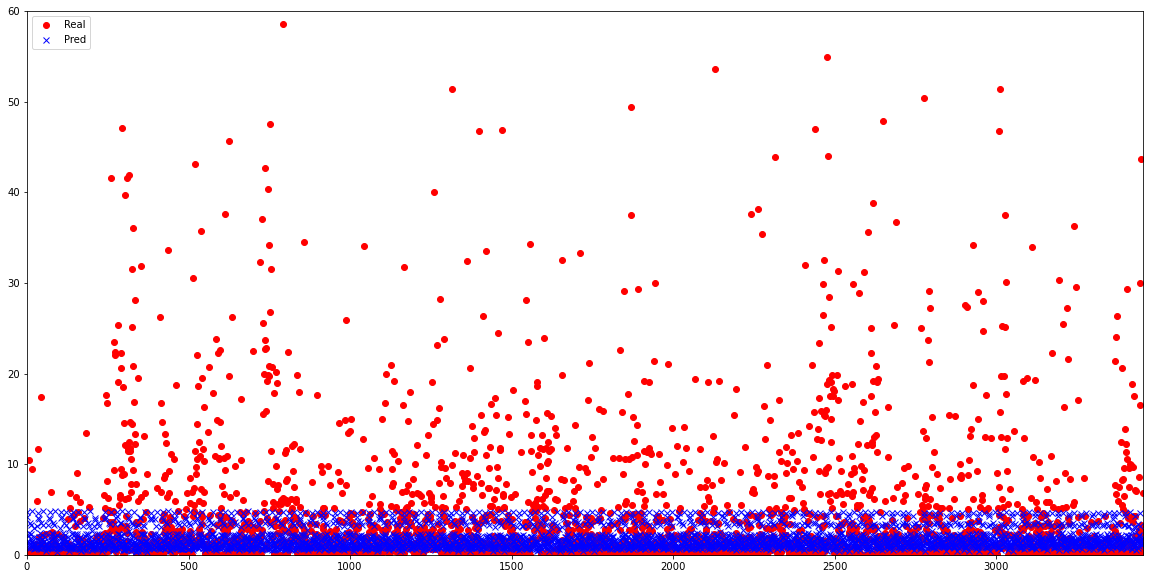

In [26]:
if CASE == 'LSTM':
    # LSTM
    x_te = x_test.reshape(-1, 1, input_size)
    pred_y = deepmodel(x_te)
    
else:
    # DNN & Linear Regression
    pred_y = deepmodel(x_test)



_data_len = len(y_test)
plt.figure(figsize=(20,10))

plot_list = [idx for idx in range(_data_len) if abs(y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx]) <= 10 or True]

# plot_list = []
# for idx in range(_data_len):
#     fix = abs(y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx])
#     if fix<= 10:
#         plot_list.append(idx)
#     else:
#         pass
data_len = len(plot_list)
# print(plot_list)
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(y_test.cpu().detach().numpy()) if i in plot_list], 'ro', label='Real')
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'bx', label='Pred')
# plt.plot([i for i in range(data_len)], [n for i, n in enumerate(y_test.cpu().detach().numpy()) if i in plot_list], 'r', label='Real_line')
# plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'b', label='Pred_line')

height = 60#max(y_test.cpu().detach().numpy())
plt.axis([0, data_len, 0, height])
plt.legend()

In [29]:
import seaborn as sns
diff_list_L2 = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]
diff_list_L2 = np.array(diff_list_L2)

## original

In [ ]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
ax.set_xticklabels(["BEFORE"])



## IQR

In [ ]:
diff_list_L2 = np.sort(diff_list_L2)

In [ ]:
q1 = np.percentile(diff_list_L2, 25)
q3 = np.percentile(diff_list_L2, 75)

In [ ]:
iqr = q3 - q1

In [ ]:
outlier = 1.5*iqr

In [ ]:
r_l2 = np.array([x for x in diff_list_L2 if (x > q1 - outlier and x < q3 +outlier)])
len(r_l2)

In [ ]:
r_l2.mean()

In [ ]:
r1 = np.array([x for x in diff_list_L2 if (x < q1 - outlier or x > q3 + outlier)])
len(r1)

In [ ]:
new_diff_list = diff_list_L2[np.abs(diff_list_L2) <= 1*diff_list_L2.std()]
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.set_xticklabels(["AFTER"])
ax.boxplot(r_l2)

# L2 case Finish

In [ ]:
######################

# for bar plot

In [ ]:
outlier_l1_after = np.round(r.mean(), 2)

In [ ]:
outlier_l1_before = np.round(diff_list.mean(), 2)

In [ ]:
outlier_l2_after = np.round(r_l2.mean(), 2)

In [ ]:
outlier_l2_before = np.round(diff_list_L2.mean(), 2)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# plt.figure(figsize=(5, 30))
labels = ['L1', 'L2']
before_list = [outlier_l1_before, outlier_l2_before]
after_list = [outlier_l1_after, outlier_l2_after]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_list, width, label='before remove outlier')
rects2 = ax.bar(x + width/2, after_list, width, label='after remove outlier')
ax.set_ylabel('Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [ ]:
res = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]
cnt = 0
tot = []
for i in range(len(res)):
    if res[i] > 20:
        cnt+=1
        tot.append(res[i])

In [ ]:
print(cnt)
sns.distplot(tot)

In [ ]:
df['next_year_percent'].min()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# plt.figure(figsize=(5, 30))
labels = ['Selected Features', 'All Features']
outlier_l1_s_before = 4.76

outlier_l1_s_after = 1.98

outlier_l1_a_before = 4.61

outlier_l1_a_after = 1.83


before_list = [outlier_l1_s_before, outlier_l1_a_before]
after_list = [outlier_l1_s_after, outlier_l1_a_after]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_list, width, label='before remove outlier')
rects2 = ax.bar(x + width/2, after_list, width, label='after remove outlier')
ax.set_ylabel('L1 Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(0.6,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2 , height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [ ]:
# !pip install hiddenlayer
import hiddenlayer as hl

In [ ]:
transforms = [hl.transforms.Prune('Constant')]

In [ ]:
graph = hl.build_graph(deepmodel, x_test, transforms=transforms)

In [ ]:
graph.them = hl.graph.THEMES['blue'].copy()

In [ ]:
graph

In [ ]:
# !pip install torchviz

In [ ]:
from torchviz import make_dot

In [ ]:
make_dot(deepmodel(x_test), params=dict(list(deepmodel.named_parameters())))

In [ ]:
from torchsummary import summary
summary(deepmodel, (df.shape[1]-1,))

In [ ]:
!pip install torchsummary